## Using Pre-Trained Models
In this exercise we will show how to load pre-trained models such as VGG16 and ResNet.  This is a fairly simple exercise designed to get you familiar with models like VGG and Resnet and the output they give.

You will load in the VGG and ResNet models.  You will then use your laptop camera to take a picture.  Then you will run your picture through these models to see the results.

You can also take pictures yourself and manually upload them.  Or find images on the internet and download them.  

Look at the results for at least 5 different pictures and consider:

- Did the models get the "right" answer?  Was the "right" answer on the list?
- How confident was the prediction (did the top choice have a probability close to 1?)
- How did the model handle pictures with multiple objects in them? (e.g. the rocking chair picture)
- What were some of the "wrong" answers on the list?  Can you understand why the image classifier may have thought those other answers were correct?


In [ ]:
# install opencv if you haven't
# conda install -c https://conda.binstar.org/menpo opencv3
# pip install pillow

In [12]:
from PIL import Image
from keras.preprocessing import image
import numpy as np
import pandas as pd

import cv2
from scipy.misc import imread
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def get_image(camera):
    retval, im = camera.read()
    return im

In [3]:
def save_webcam_image(img_path):

    try:
        camera_port = 0
        ramp_frames = 10
    
        camera = cv2.VideoCapture(camera_port)

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        del (camera)
        return True
    except ValueError as e:
        print("Image Capture Failed")
    return False

In [46]:
img_path = "webcam_test_img.png"

if save_webcam_image(img_path) is False:
    # Webcam not active, use the rocking chair Image
    img_path = "rocking_chair.jpg"
    print("Using the Test Rocking Chair Image: {}".format(img_path))

/home/olszewskip/miniconda3/envs/py36data/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


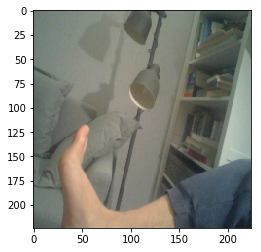

In [47]:
plt.imshow(imread(img_path))

## VGG16 - Pretrained Model

In [17]:
from keras.applications import vgg16


vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()

553467904/553467096 [==============================] - 57s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_p

In [18]:
# Utility Function to Load Image, Preprocess input and Targets
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

In [48]:
#img_path="rocking_chair.png"  ## Uncomment this and put the path to your file here if desired
# Predict Results
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

,Predicted Class,Name,Probability
0,n04162706,seat_belt,0.160364
1,n03483316,hand_blower,0.040693
2,n04070727,refrigerator,0.025157
3,n04229816,ski_mask,0.018438
4,n04209133,shower_cap,0.018250
5,n02977058,cash_machine,0.016420
6,n02786058,Band_Aid,0.015550
7,n04090263,rifle,0.015227
8,n03868863,oxygen_mask,0.014501
9,n03476991,hair_spray,0.014290


## Resnet50 - Pretrained Model

In [ ]:
# Define a Resnet model and print the model summary (follow the same procedure as in VGGNet)

# It will download the weights that might take a while
# Also, the summary will be quite long, since Resnet50 is a much larger network than VGG16

In [34]:
from keras.applications import resnet50

In [35]:
resnet50_model = resnet50.ResNet50(weights='imagenet')
resnet50_model.summary()

102858752/102853048 [==============================] - 12s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
_________________________________________

In [ ]:
# Predict Results

In [49]:
predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

,Predicted Class,Name,Probability
0,n02892767,brassiere,0.091983
1,n03633091,ladle,0.046334
2,n15075141,toilet_tissue,0.045399
3,n04209239,shower_curtain,0.037348
4,n03887697,paper_towel,0.029273
5,n03742115,medicine_chest,0.027426
6,n04270147,spatula,0.025545
7,n04376876,syringe,0.023533
8,n02786058,Band_Aid,0.019748
9,n04553703,washbasin,0.015337
